In [1]:

#### Loading the necessary libraries.


library(tidyverse)

library(lubridate)



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
#### Reading the data of 6 months starting from April to September into its respective dataframes.


april_data <- read_csv("/Users/sharadraina/Desktop/archive/Project_02/Uber-dataset/uber-raw-data-apr14.csv" , show_col_types = FALSE)

may_data <- read_csv("/Users/sharadraina/Desktop/archive/Project_02/Uber-dataset/uber-raw-data-may14.csv" , show_col_types = FALSE)

june_data <- read_csv("/Users/sharadraina/Desktop/archive/Project_02/Uber-dataset/uber-raw-data-jun14.csv" , show_col_types = FALSE)

july_data <- read_csv("/Users/sharadraina/Desktop/archive/Project_02/Uber-dataset/uber-raw-data-jul14.csv" , show_col_types = FALSE)

august_data <- read_csv("/Users/sharadraina/Desktop/archive/Project_02/Uber-dataset/uber-raw-data-aug14.csv" , show_col_types = FALSE)

september_data <- read_csv("/Users/sharadraina/Desktop/archive/Project_02/Uber-dataset/uber-raw-data-sep14.csv" , show_col_types = FALSE)

head(september_data , 3)

Date/Time,Lat,Lon,Base
<chr>,<dbl>,<dbl>,<chr>
9/1/2014 0:01:00,40.2201,-74.0021,B02512
9/1/2014 0:01:00,40.7500,-74.0027,B02512
9/1/2014 0:03:00,40.7559,-73.9864,B02512


In [3]:
##### All the dataframes convey the similar information w.r.t Date/Time and Latitude and Longitude and Base. 
##### The date/time column is present in character format and needs to be tidyed in appropriate datatype.

In [6]:
#### I am using rbind function to append the data as all the dataframes have same number of columns and 
#### represent a time frame from April-September which will make it easier to analyse when joined row wise.

In [7]:
# Joining all the dataframes into one named data_2014.

data_2014 <- rbind(april_data , may_data,june_data,july_data,august_data,september_data)




cat("The final dataframe consists of" , dim(data_2014) [1] , "rows","and" , dim(data_2014)[2] , "columns")

The final dataframe consists of 4534327 rows and 4 columns

In [8]:
#### Tidying the date/time column.


# Using as.PosixCT function to convert datatype of date/time column and formatting it in appropriate ymd format.
data_2014$`Date/Time` <- as.POSIXct(data_2014$`Date/Time` , format = "%m/%d/%Y %H:%M:%S")

head(data_2014$`Date/Time` , 5)

[1] "2014-04-01 00:11:00 EDT" "2014-04-01 00:17:00 EDT"
[3] "2014-04-01 00:21:00 EDT" "2014-04-01 00:28:00 EDT"
[5] "2014-04-01 00:33:00 EDT"

In [9]:
#Creating a separate column which records Time in the form of hours:minutes:seconds
data_2014$Time <- format(as.POSIXct(data_2014$`Date/Time`, format = "%m/%d/%Y %H:%M:%S"), format="%H:%M:%S")

head(data_2014$Time , 3 )

[1] "00:11:00" "00:17:00" "00:21:00"

In [10]:
#### Creating variables that store values from Hour, Minute and Second which can then be used to visualize data for particular time intervals. I will use Lubridate package for creating/handling date/time variables.


data_2014$Hour <- hour(data_2014$`Date/Time`)

data_2014$Minutes <- minute(data_2014$`Date/Time`)

data_2014$Seconds <- second(data_2014$`Date/Time`)

head(data_2014 , 3)

Date/Time,Lat,Lon,Base,Time,Hour,Minutes,Seconds
<dttm>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>
2014-04-01 00:11:00,40.7690,-73.9549,B02512,00:11:00,0,11,0
2014-04-01 00:17:00,40.7267,-74.0345,B02512,00:17:00,0,17,0
2014-04-01 00:21:00,40.7316,-73.9873,B02512,00:21:00,0,21,0


In [11]:
### Creating values for month, day , weekday and year which can be used to visualize data for particular days.


data_2014$Day <- day(data_2014$`Date/Time`)

data_2014$Weekday <- wday(data_2014$`Date/Time`)

data_2014$Month <- month(data_2014$`Date/Time`)

data_2014$Year <- year(data_2014$`Date/Time`)

data_2014$Monthname <- month(data_2014$`Date/Time` , label = TRUE)

data_2014$Dayname  <- wday(data_2014$`Date/Time` , label = TRUE)

head(data_2014)

Date/Time,Lat,Lon,Base,Time,Hour,Minutes,Seconds,Day,Weekday,Month,Year,Monthname,Dayname
<dttm>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<ord>,<ord>
2014-04-01 00:11:00,40.7690,-73.9549,B02512,00:11:00,0,11,0,1,3,4,2014,Apr,Tue
2014-04-01 00:17:00,40.7267,-74.0345,B02512,00:17:00,0,17,0,1,3,4,2014,Apr,Tue
2014-04-01 00:21:00,40.7316,-73.9873,B02512,00:21:00,0,21,0,1,3,4,2014,Apr,Tue
2014-04-01 00:28:00,40.7588,-73.9776,B02512,00:28:00,0,28,0,1,3,4,2014,Apr,Tue
2014-04-01 00:33:00,40.7594,-73.9722,B02512,00:33:00,0,33,0,1,3,4,2014,Apr,Tue
2014-04-01 00:33:00,40.7383,-74.0403,B02512,00:33:00,0,33,0,1,3,4,2014,Apr,Tue


In [12]:

#Dropping NA values
data_2014 =  drop_na(data_2014)

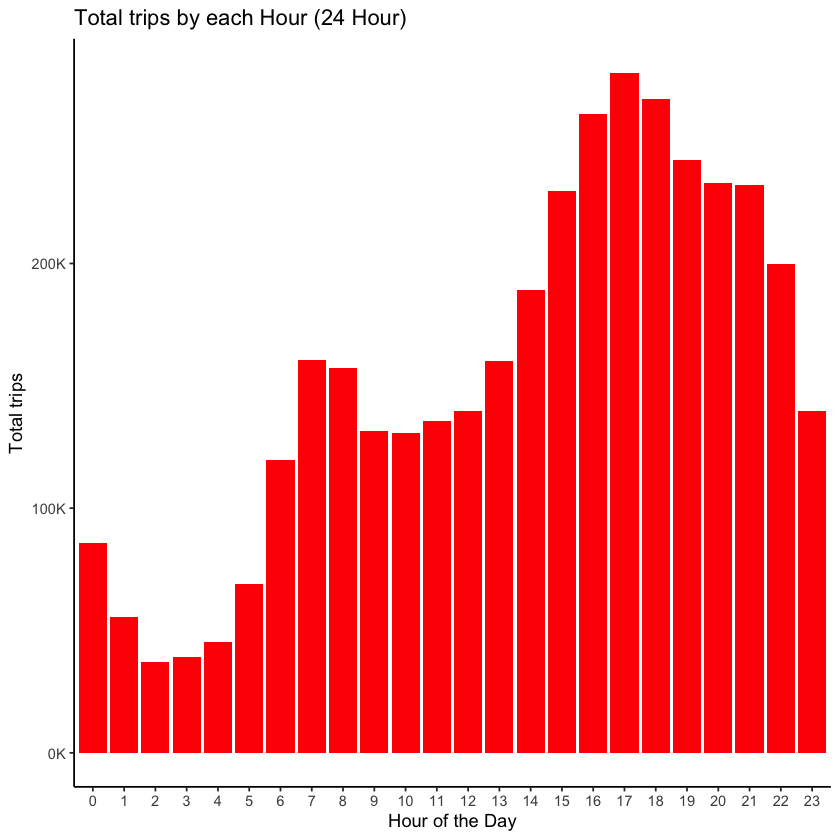

In [13]:
#### Plotting trips by the hour


data_2014 %>%
  
  group_by(Hour) %>%
  
  summarise(Total = n()) %>%
  
  ggplot(aes(factor(Hour) ,Total / 1000 )) +
  
  scale_y_continuous(labels = function(x) paste0(x , "K")) +
  
   geom_bar(stat = "identity" , fill = "red") +
  
  theme_classic() +
  
  labs(title = "Total trips by each Hour (24 Hour)" , 
       
       x = "Hour of the Day" , 
       
       y = "Total trips")

In [15]:

##### The hours between 2:00 am and 4:00 am experience the lowest number of trips, 
##### indicating reduced demand during these late-night hours. 
##### Companies can adjust their driver scheduling and resource allocation during this time to optimize efficiency
##### and minimize costs.

##### A steady increase in trips is observed from 6:00 am to 8:00 am, likely due to commuters traveling to work or 
##### other daytime activities. This morning rush hour signifies a peak in demand, 
##### suggesting the need for adequate driver availability to meet the increased transportation needs 
##### of passengers during this time. 

##### Max trips throughtout the day occur in the evening around 7pm so hours 
##### from 5-9 can be considered the busiest for these drivers. 
##### Hence maximum demand that gets generated is during evening hours.

##### Overall, 2 peaks are witnessed throughout the day: One in morning during office hours and 
##### the second during evening time when usually office hours for the day would finish.

##### With a clear understanding of peak hours and low-demand periods, 
##### businesses can prioritize service availability during peak times to 
##### ensure timely pickups and shorter wait times for customers. 
##### This leads to improved customer satisfaction and loyalty, 
##### ultimately driving repeat business and positive word-of-mouth referrals.

##### Armed with knowledge of peak demand periods, businesses can design targeted incentive programs to 
##### encourage driver availability during these times. 
##### This can include bonuses, promotions, or rewards for drivers who operate during high-demand hours, 
##### thereby ensuring a sufficient supply of drivers to meet customer demand.


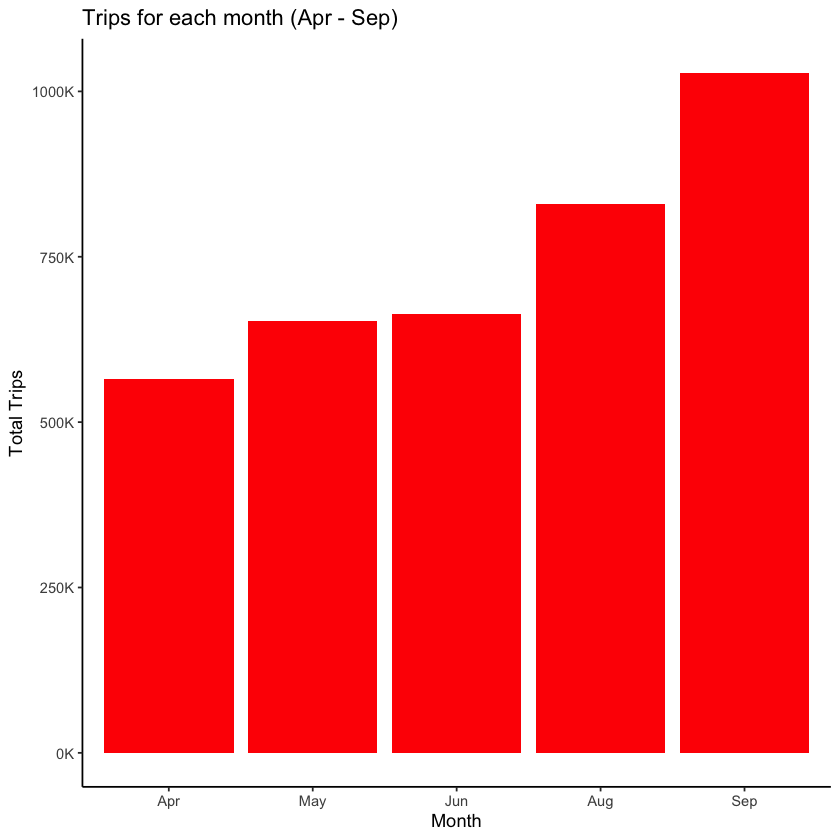

In [16]:
####Plotting trips by Month


data_2014 %>%
  
  group_by(Monthname ) %>%
  
  summarise(Total = n()) %>%
  
  ggplot(aes( Monthname, Total / 1000 )) +
  
  scale_y_continuous(labels = function(x)  paste0(x , "K")) +
  
  geom_bar(stat = "identity" , fill = "red") +
  
  theme_classic() +
  
  labs(title = "Trips for each month (Apr - Sep)" , 
       
       x = "Month" , 
       
       y = "Total Trips") 

In [17]:
##### The peak months of August and September indicate periods of high demand, 
##### presenting opportunities for increased revenue generation. 
##### Businesses can capitalize on these peak periods by implementing surge pricing or 
##### targeted promotional campaigns to maximize profits.

##### Understanding the seasonal variation in demand allows businesses to allocate resources more effectively. 
##### For example, during peak months, they can ensure sufficient availability of drivers and 
##### vehicles to meet customer demand, while during off-peak months, 
##### they can optimize resource utilization to minimize costs.

##### Analyzing the reasons behind the fluctuation in demand can provide insights into customer behavior. 
##### Businesses can use this information to tailor their services and offerings to better meet customer needs and 
##### preferences, ultimately enhancing customer satisfaction and loyalty.

#####  If there is a significant increase in demand in a particular region during a specific month, 
##### businesses can consider expanding their operations to capitalize on this opportunity.

##### Each month's performance provides valuable insights into the demand for Uber services, 
##### which can help in strategic planning, resource allocation, and marketing efforts.

`summarise()` has grouped output by 'Monthname'. You can override using the
`.groups` argument.


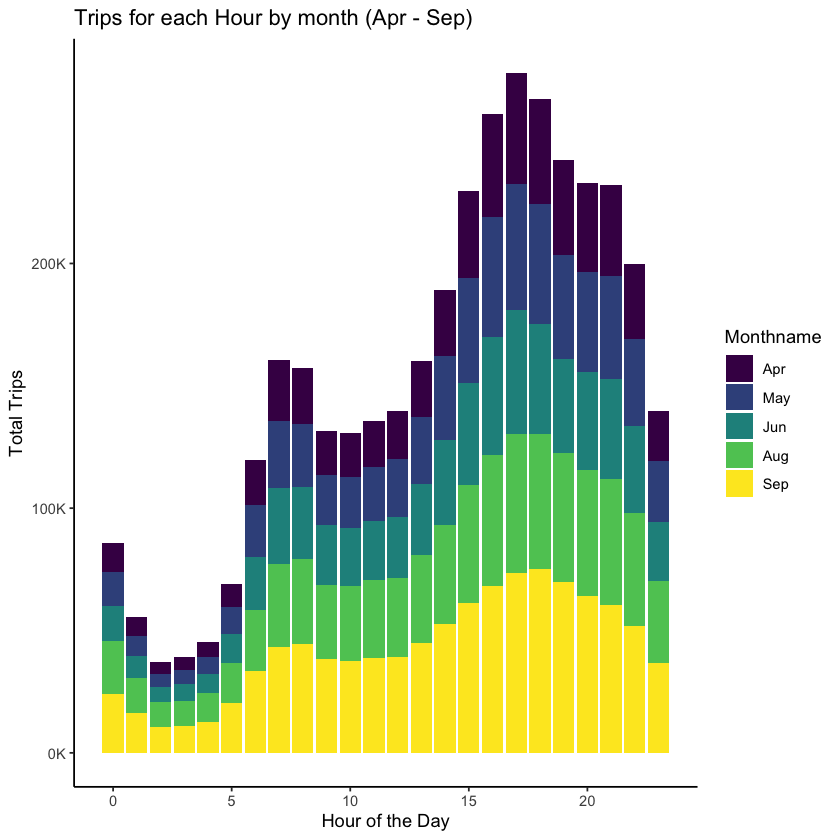

In [18]:
data_2014 %>%
  
  group_by(Monthname , Hour) %>%
  
  summarise(Total = n()) %>%
  
  ggplot(aes( Hour,Total / 1000 , fill =  Monthname)) +
  
  scale_y_continuous(labels = function(x) paste0(x , "K")) +
  
    theme_classic() +
  
  labs(title = "Trips for each Hour by month (Apr - Sep)" , 
       
       x = "Hour of the Day" , 
       
       y = "Total Trips") +


  
  geom_bar(stat = "identity")

In [19]:
##### Combining the above 2 visualizations to see which months and which hours of the day contribute
##### to maximum uber trips.


`summarise()` has grouped output by 'Monthname'. You can override using the
`.groups` argument.


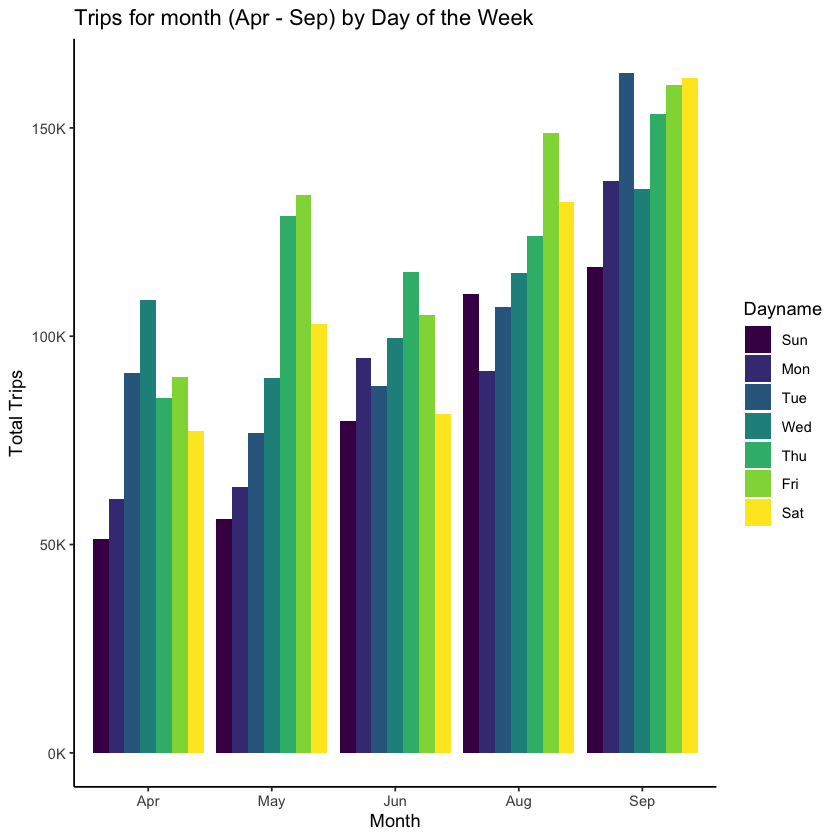

In [20]:
data_2014 %>%
  
  group_by(Monthname , Dayname) %>%
  
  summarise(Total = n()) %>%
  
  ggplot(aes( Monthname, Total / 1000 , fill = Dayname  )) +
  
    scale_y_continuous(labels = function(x) paste0(x , "K")) +
  
  geom_bar(stat = "identity" , position = "dodge") +
  
      theme_classic() +
  
  labs(title = "Trips for month (Apr - Sep) by Day of the Week" , 
       
       x = "Month" , 
       
       y = "Total Trips") 


In [21]:
##### The highest number of Uber trips occurring in August and September suggests that 
##### these months experience the highest demand for ride-sharing services. 
##### This could be attributed to factors such as summer vacations, events, or 
##### increased outdoor activities during these months.

##### The observation that Thursday, Friday, and Saturday consistently have the highest number of trips 
##### for each month implies that these days are peak days for ride-sharing services. 
##### This pattern aligns with typical trends in consumer behavior, where people may require more transportation 
##### options for social events, outings, or weekend leisure activities.

##### The insights from this visualization present opportunities for Uber and other ride-sharing companies to 
##### strategically allocate resources and tailor promotional activities to capitalize on peak demand periods, 
#####particularly during the summer months and on weekends. 
#####This could involve targeted marketing campaigns, special promotions, or 
##### incentives aimed at increasing rider engagement and driver availability during these high-demand periods.